# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Linaili Himmatus Suroyya
- **Email:** linailihimmatuss@students.undip.ac.id
- **ID Dicoding:** linaili_himmatus_suroyya_phKk

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana keadaan polusi udara di Changping?
- Pertanyaan 2 : Bagaimana tren jenis polusi udara dalam tahunan dan bulanan di Changping?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
KotaC = pd.read_csv("/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
KotaC

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [ ]:
KotaC.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

In [ ]:
KotaC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
KotaC.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("jumlah duplikasi: ", KotaC.duplicated().sum())

jumlah duplikasi:  0


In [ ]:
KotaC.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

tidak dilakukan penghapusan data duplikat untuk file data kota Aotizhongxin karena tidak ada data yang terduplikasi

In [ ]:
KotaC.dropna(inplace = True)

In [ ]:
KotaC.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
KotaC.nunique()

No         32681
year           5
month         12
day           31
hour          24
PM2.5        467
PM10         547
SO2          187
NO2          210
CO           115
O3           617
TEMP         978
PRES         592
DEWP         599
RAIN         113
wd            16
WSPM          94
station        1
dtype: int64

In [ ]:
KotaC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32681 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32681 non-null  int64  
 1   year     32681 non-null  int64  
 2   month    32681 non-null  int64  
 3   day      32681 non-null  int64  
 4   hour     32681 non-null  int64  
 5   PM2.5    32681 non-null  float64
 6   PM10     32681 non-null  float64
 7   SO2      32681 non-null  float64
 8   NO2      32681 non-null  float64
 9   CO       32681 non-null  float64
 10  O3       32681 non-null  float64
 11  TEMP     32681 non-null  float64
 12  PRES     32681 non-null  float64
 13  DEWP     32681 non-null  float64
 14  RAIN     32681 non-null  float64
 15  wd       32681 non-null  object 
 16  WSPM     32681 non-null  float64
 17  station  32681 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.7+ MB


In [ ]:
KotaC.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan 1: Bagaimana keadaan polusi udara di Changping?

In [ ]:
#Air Pollution
AP = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

Air_pollutions = {}
for pollutant in AP:
    Air_pollution = KotaC[pollutant].mode().values[0]
    Air_pollutions[pollutant] = Air_pollution

# Measure of the type of air pollution
print("Measure of the type of air pollution:")
sorted_pollutants = sorted(Air_pollutions.items(), key=lambda x: x[1], reverse=True)
for pollutant, value in sorted_pollutants:
    print(f"{pollutant}: {value}")


# The most common type of air pollutant
pollutant_counts = {}
for pollutant in AP:
    count = KotaC[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count
Most_type_pollution = max(pollutant_counts, key=pollutant_counts.get)

print(f"So, the most common type of air pollutant is {Most_type_pollution}")

Measure of the type of air pollution:
CO: 500.0
PM10: 22.0
NO2: 20.0
PM2.5: 11.0
SO2: 2.0
O3: 2.0
So, the most common type of air pollutant is CO


Pertanyaan 2: Bagaimana tren jenis polusi udara dalam tahunan dan bulanan di Changping?

Grouping by years

In [ ]:
columns_to_drop = ['No', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
df = KotaC.drop(columns=columns_to_drop)

In [ ]:
df.head()

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3.0,6.0,13.0,7.0,300.0,85.0
1,2013,3.0,3.0,6.0,6.0,300.0,85.0
2,2013,3.0,3.0,22.0,13.0,400.0,74.0
3,2013,3.0,6.0,12.0,8.0,300.0,81.0
4,2013,3.0,3.0,14.0,8.0,300.0,81.0


In [ ]:
# Membuat kelompok berdasarkan nilai pada kolom 'year'
grouped_df = df.groupby('year')

# Menghitung rata-rata pada kolom variabel untuk setiap kelompok
result_df = grouped_df['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean().reset_index()

# Membatasi data hanya untuk rentang nilai 'year' dari 2013-2017
result_df = result_df[result_df['year'].between(2013, 2017)]

# Menampilkan hasil
print(result_df)

   year      PM2.5        PM10        SO2        NO2           CO         O3
0  2013  70.793076   90.422623  20.627632  41.713783  1042.141832  60.441771
1  2014  79.005075  106.122316  20.930534  45.612202  1192.501500  62.456329
2  2015  69.377287   93.497604  11.789714  42.620002  1161.483543  57.671939
3  2016  60.837451   85.564015   8.117626  45.568270  1121.941128  53.836624
4  2017  79.469373   93.792620  16.511439  50.979336  1534.022140  33.405166


<ipython-input-18-4640369c6bd9>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_df = grouped_df['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean().reset_index()


Grouping by month

In [ ]:
columns_to_drop = ['No', 'year', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
month_df = KotaC.drop(columns=columns_to_drop)

In [ ]:
month_df.head()

,month,PM2.5,PM10,SO2,NO2,CO,O3
0,3,3.0,6.0,13.0,7.0,300.0,85.0
1,3,3.0,3.0,6.0,6.0,300.0,85.0
2,3,3.0,3.0,22.0,13.0,400.0,74.0
3,3,3.0,6.0,12.0,8.0,300.0,81.0
4,3,3.0,3.0,14.0,8.0,300.0,81.0


In [ ]:
# Membuat kelompok berdasarkan nilai pada kolom 'month'
grouped = month_df.groupby('month')

# Menghitung rata-rata pada kolom variabel untuk setiap kelompok
result = grouped['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean().reset_index()

# Membatasi data hanya untuk rentang nilai 'month' dari 1-12
result = result[result['month'].between(1, 12)]

# Menampilkan hasil
print(result)

    month      PM2.5        PM10        SO2        NO2           CO         O3
0       1  84.287513  104.580162  32.120647  57.790784  1873.865635  27.351847
1       2  78.271807   95.518692  28.924065  48.219626  1377.686916  37.536604
2       3  84.052824  128.869874  25.714505  55.118375  1247.451534  50.254742
3       4  69.803460  109.246964  11.457490  41.370995   779.595142  70.861810
4       5  61.135880   97.249018  12.157694  34.490718   703.627276  92.482114
5       6  56.030163   72.321324   6.687055  29.437369   782.798911  97.700880
6       7  63.634728   74.087004   4.660059  26.960352   818.611601  97.107930
7       8  46.355960   63.058385   4.372384  27.492446   724.151074  91.747089
8       9  52.946825   65.450770   4.854566  37.487336   835.849305  59.163735
9      10  81.426114  100.532838   6.609851  53.749023  1029.554339  28.897412
10     11  77.905235  104.413818  15.085328  56.157123  1564.529915  19.677477
11     12  86.181469  109.250000  25.954895  61.2541

<ipython-input-23-01070c4738f3>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean().reset_index()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana keadaan polusi udara di Changping?

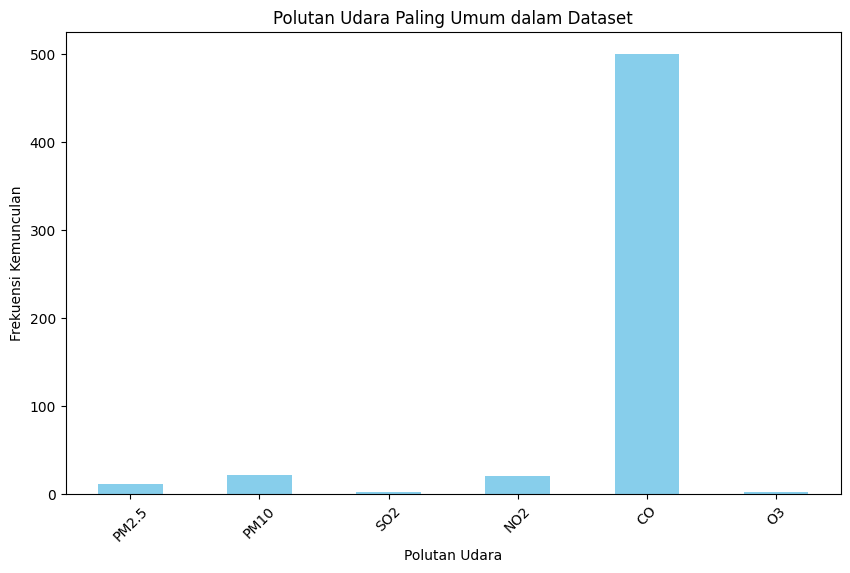

In [ ]:
# Kolom-kolom yang mengandung data polutan udara
AP = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = KotaC[AP].mode().iloc[0]

# Membuat diagram batang untuk polutan yang paling umum
plt.figure(figsize=(10, 6))
pollutant_counts.plot(kind='bar', color='skyblue')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.xticks(rotation=45)
plt.show()

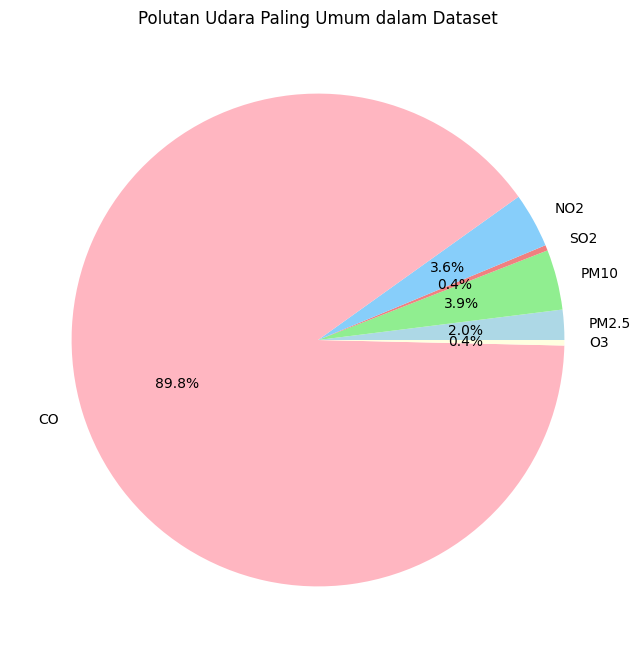

In [ ]:
# Kolom-kolom yang mengandung data polutan udara
AP = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = KotaC[AP].mode().iloc[0]

# Membuat diagram lingkaran untuk polutan yang paling umum
plt.figure(figsize=(8, 8))
pollutant_counts.plot(kind='pie', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow'], autopct='%1.1f%%')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.ylabel('')

plt.show()


### Pertanyaan 2:

Bagaimana tren jenis polusi udara dalam tahunan dan bulanan di Changping?

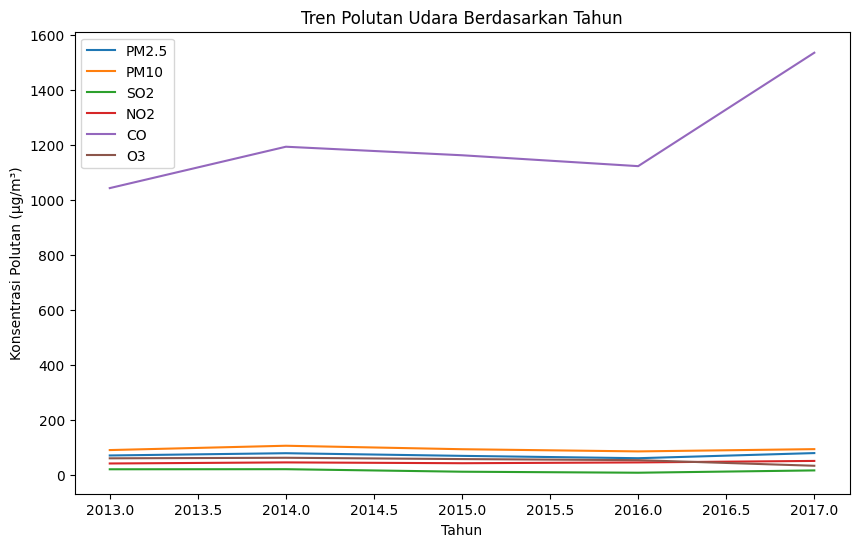

In [ ]:
# Plotting line by year
AP = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
plt.figure(figsize=(10, 6))
for pollutant in AP:
    plt.plot(result_df['year'], result_df[pollutant], label=pollutant)

plt.title('Tren Polutan Udara Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.legend()

plt.show()


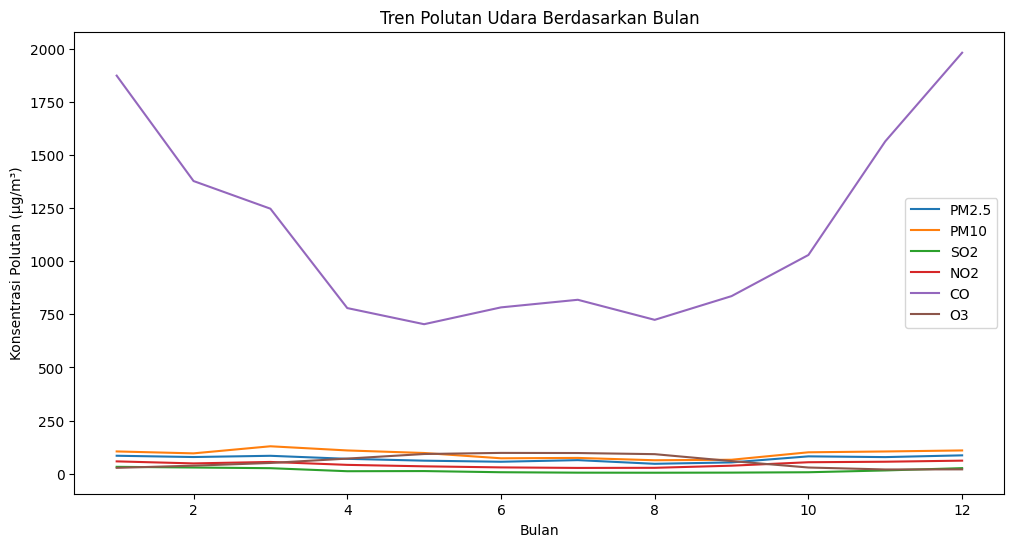

In [ ]:
AP = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# plotting line by month
plt.figure(figsize=(12, 6))
for column in AP:
    plt.plot(result['month'], result[column], label=column)

plt.title('Tren Polutan Udara Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.legend()
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Bagaimana keadaan polusi udara di Changping? Terdapat beberapa jenis polutan udara di Changping dengan jenis polutan paling banyak adalah CO (karbon) sebanyak 89,9% diikuti dengan PM10 (partikulat 10) sebanyak 3,9%, dan NO2 (Nitrogen Dioksida) sebanyak 3,6%


- Conclusion pertanyaan 2 : Bagaimana tren jenis polusi udara dalam tahunan dan bulanan di Changping? Berdasarkan analisis tren tahunan dari masing masing polutan, dimana CO berada pada peringkat teratas yang semakin naik tiap tahunnya hingga tahun 2017. berdasarkan analisis tren bulanan, polutan CO berada pada titik tertinggi pada Bulan Januari dan Bulan Desember.

In [ ]:
KotaC.to_csv("all_data.csv", index=False)